In [26]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 16
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
#mpl.style.use('default')
pi2 = 2*np.pi

# print(plt.style.available)
print(sys.version_info)

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


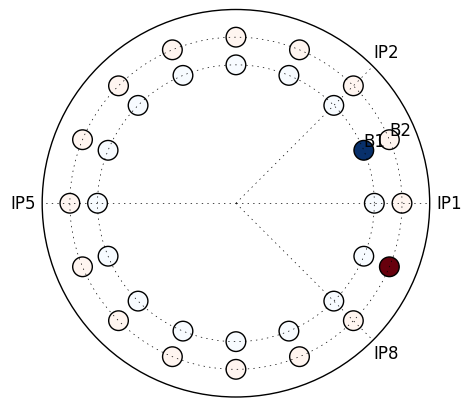

In [27]:
Slots = 16
ang = pi2*np.linspace(0,1,Slots,endpoint=False)
B1 = np.zeros(Slots)
B2 = np.zeros(Slots)
B1[0] = 1
B2[0] = 1
B1_r = 1
B2_r = 1.2

ang+=pi2/Slots

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.scatter(ang,np.ones_like(ang)*B1_r,c = B1,s=200,cmap='Blues')
ax.scatter(-ang,np.ones_like(ang)*B2_r,c = B2,s=200,cmap='Reds',vmin=0, vmax=1)
ax.set_xticks(np.pi*np.array([0,1/4,1,7/4]))  ;   ax.set_xticklabels(['IP1','IP2','IP5','IP8'])
ax.set_yticks([B1_r,B2_r])  ;  ax.set_yticklabels(['B1','B2'])

ax.set_rmax(1.4)
print(B1)

[ 1.  1.  1.  0.  0.  0.  0.  0.]


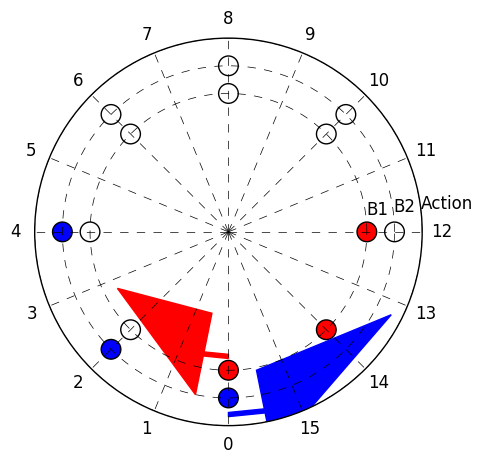

In [28]:
pi2 = np.pi*2
Slots = 8
Actions = 2*Slots
shift = 1.5*np.pi
ang = pi2*np.linspace(0,1,Slots,endpoint=False)
B1 = np.zeros(Slots)
B2 = np.zeros(Slots)
B1[0:3] = 1
B2[0:3] = -1
B1_r = 1
B2_r = 1.2
A_r = 1.4

# ang+=pi2/Slots

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.scatter(shift + ang,np.ones_like(ang)*B1_r,c = B1,edgecolors='k',s=200,cmap='bwr',vmin=-1, vmax=1)
ax.scatter(shift - ang,np.ones_like(ang)*B2_r,c = B2,edgecolors='k',s=200,cmap='bwr',vmin=-1, vmax=1)
ax.set_xticks(np.pi*np.arange(2*Slots)/Slots + shift)  ;   ax.set_xticklabels((Actions-np.arange(Actions))%Actions)
ax.set_rlabel_position(45/Slots)
ax.set_yticks([B1_r,B2_r,A_r])  ;  ax.set_yticklabels(['B1','B2','Action'])
plt.grid(linestyle='--')
ax.arrow(shift,B1_r*.9,-.2,0,width=.03,color='r')
ax.arrow(shift,B2_r*1.1,.2,0,width=.03,color='b')

ax.set_rmax(1.4)
print(B1)

a 1.0 0.941858714747


NameError: name 'a' is not defined

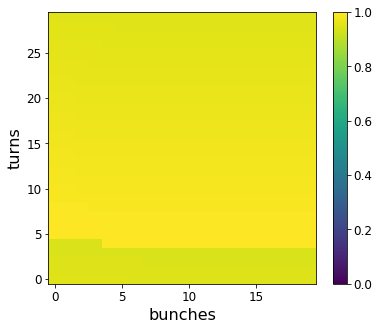

In [5]:
def pcolor_edges(x,y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    x = np.concatenate(([x[0]-dx],x))+dx*0.5
    y = np.concatenate(([y[0]-dy],y))+dy*0.5
    return np.meshgrid(x,y)
    

Nb = 20
Nt = 30
r=0.0001
b = np.arange(Nb)
t = np.arange(Nt)
B,T = np.meshgrid(b,t)
# a= np.zeros((Nb,Nt))
Bplot, Tplot = pcolor_edges(b,t)
ti = 4
bi = 4
# Ti = np.roll(T,shift = ti, axis=0)
Ti = -(Nt-T+ti)%Nt   
Bi = -(Nb-B+bi)%Nb
Ti[B<bi]-=1
Ti = Ti%Nt

a1= 1*np.exp(-(Ti*Nb+Bi)*r)

plt.figure()
plt.pcolormesh(Bplot,Tplot,a1,vmin = 0)
plt.xlim(np.min(Bplot),np.max(Bplot))
plt.ylim(np.min(Tplot),np.max(Tplot))
plt.xlabel('bunches')
plt.ylabel('turns')
plt.colorbar()
print('a',np.max(a1),np.min(a1))
print(a.shape, B.shape)
print('T',np.max(T),np.min(T))
print('Ti',np.max(Ti),np.min(Ti))


if 1:
    a[:]=0
    for i in range(0,15):
        ti = i%Nt
        for j in range(0,Nb):
            bi = j
            a[ti,bi] = 0
            Ti = -(Nt-T+ti)%Nt   
            Bi = -(Nb-B+bi)%Nb
            Ti[B<bi]-=1
            Ti = Ti%Nt
            a+= 1*np.exp(-(Ti*Nb+Bi)*r)


    plt.figure()
    plt.pcolormesh(Bplot,Tplot,a,vmin = 0)
    plt.xlim(np.min(Bplot),np.max(Bplot))
    plt.ylim(np.min(Tplot),np.max(Tplot))
    plt.xlabel('bunches')
    plt.ylabel('turns')
    plt.colorbar()


In [6]:
print(Bi)
print(Ti)

[[16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13

In [7]:
off = 1
x = np.arange(10)
print((x-off))
print((x-off)%10)
print(-(off+10-x)%10)


[-1  0  1  2  3  4  5  6  7  8]
[9 0 1 2 3 4 5 6 7 8]
[9 0 1 2 3 4 5 6 7 8]


In [8]:
np.array(np.shape(T)) +[1,1]

array([31, 21])

In [9]:
x = np.concatenate((x,[1]))

# Parallisation

In [10]:
nB     = 8
nLR    = 1
nTurns = 3

bool_combi      = 1
bool_weakstrong = 0
bool_trained    = 1
bool_circular   = 1
bool_turnbyturn = 0
bool_annotate   = 1
bool_BB         = 1
bool_Wake       = 1
bool_indep      = 1 
wake_fac        = 0.5/nB

bool_legend = 1

onetwo = np.array([1,2])
# if bool_weakstrong:
#     onetwo = np.array([1])

print(onetwo)
# nSteps = (1+nLR*2) + 2 + 1 + 1
tHO=          1
tLR=    tHO * 1
tWake = tHO * nB*wake_fac
tKick = tHO * nB*wake_fac
tInd =  tHO * 1

[1 2]


In [11]:
def status(tot_times, times, bool_trained,bool_turnbyturn):
    print('trained=',bool_trained, ', turnbyturn=',bool_turnbyturn)
    print('cpu times ',tot_times)
    print('wall times',np.max(times,axis=1))
    print('max CPU time = ',np.max(tot_times))
    print('max wall time =',np.max(times))

tself,tother=0,0
tlist = [0,tHO,tLR,tWake,tKick,tInd]
actList = [0,1,2,3,4,5]
BB_app=[]
if nLR%2>0 and False:
    BB_app=[0]    

BBpipe = np.concatenate((BB_app,np.ones(nLR)*2,[1],np.ones(nLR)*2,BB_app),axis=0)
pipeline= np.concatenate((BBpipe,[5,0],[3,4,0,0]),axis=0)
# pipeline= np.concatenate((BBpipe,[0,5],[0,3,4,0]),axis=0)
if bool_weakstrong:
    pipeline= np.concatenate((BBpipe,[5],[3,4]),axis=0)
    
if bool_combi and 2*nB>np.size(pipeline) and 1:
    pipeline=np.concatenate((pipeline,np.zeros(2*nB-np.size(pipeline))),axis=0)
    
    pipeline= np.concatenate(([0,2]*nLR,[0,1],[0,2]*nLR,[0,5],[0,3,4]),axis=0)
    pipeline=np.concatenate((pipeline,np.zeros(4*nB-np.size(pipeline))),axis=0)
    

# pipeline_shift=np.zeros_like(pipeline).astype(np.int32)
# for i,act in enumerate(pipeline[:-2]):
#     cnt=0
#     if act ==1 or act==2:
#         if np.any(pipeline[i+1]==onetwo): 
#             cnt+=1
#             if np.any(pipeline[i+2]==onetwo): cnt+=1
#         pipeline_shift[i]=cnt
# pipeline_shift[pipeline==1] *= bool_BB
# pipeline_shift[pipeline==2] *= bool_BB

pipeline[pipeline==1] *= bool_BB
pipeline[pipeline==2] *= bool_BB
pipeline[pipeline==3] *= bool_Wake
pipeline[pipeline==4] *= bool_Wake
pipeline[pipeline==5] *= bool_indep

print(pipeline)
# print(pipeline_shift)
nSteps = np.size(pipeline)


B1 = np.arange(nB)
B2 = np.arange(nB)

actions = np.zeros((nB,nSteps*nTurns+2))
times = np.zeros((nB,nSteps*nTurns+2))
act_times = np.zeros((nB,nSteps*nTurns+2))
tot_times = np.zeros(nB)
pipeline_all = np.zeros(nSteps*nTurns+2).astype(np.int32)

step_tot=0
for turn in range(nTurns):
    if bool_turnbyturn:
        times[:,step_tot+1] = np.max(times[:,step_tot+1])
    
    for b in range(nB):
        cnt = -nLR
        for step in range(nSteps):
            bool_BB_now = 0
            step_tot = nSteps*turn+step
            
            actions[b,step_tot]    = pipeline[step]
            pipeline_all[step_tot] = pipeline[step]
            # if enter BB interaction area
            if step>0:
                if bool_combi:
                    if np.any(pipeline[step]==onetwo) and \
                    np.all(pipeline[step-2]!=onetwo):
                        cnt=-nLR
                else:
                    if np.any(pipeline[step]==onetwo) and \
                    np.all(pipeline[step-1]!=onetwo):
                        cnt=-nLR
            
            # Check if BB interaction now or not
            bool_BB_now  = np.any(actions[b,step_tot]==onetwo)
            bool_BB_next = False
            if bool_BB_now :
                if b==0:
                    print(b,cnt,nB,bool_trained,pipeline[step],bool_BB_now ,actions[b,step_tot] )
            
                if (b+cnt<0 or b+cnt>nB-1) and bool_trained and cnt!=0:
                    actions[b,step_tot]=0
                    bool_BB_now = 0
                cnt+=1 
                bool_BB_next = np.any(pipeline[step+1]==onetwo)
                
                if b==0:
                    print(b,cnt,nB,bool_trained,pipeline[step],bool_BB_now ,actions[b,step_tot] )
                
                if bool_combi:
                    bool_BB_next = np.any(pipeline[step+2]==onetwo)
                    
            
            #(bool_BB_now and ((bool_trained and pipeline[step+1]abs(cnt)<=nLR) \
             #                   or (not bool_trained and (b+cnt>0 and b+cnt<=nB-1))))
            # Wake field chronology            
#             if actions[b,step_tot]==4 and turn>0 and b==0:
#                 shift = -nSteps
#             if b ==0 and turn ==0:
#                 if step_tot ==0:
#                     times[b,step_tot]=0
#                 else:
#                     times[b,step_tot] = times[b,step_tot-1] + action_time 
#             else:

#             if 0:
#                 # cannot start before previous is done with it
#                 if step_tot == 0:
#                     times[b,step_tot] = times[b-1,step_tot+shift]
#                 else:
#                     times[b,step_tot] = np.max([times[b-1,step_tot+shift], \
#                                                 times[b,step_tot]])
#             else:

            action_time = tlist[int(actions[b,step_tot])]    
            act_times[b,step_tot] = action_time
            tot_times[b] += action_time
            
            # cannot start before it is ready for you
            tself = times[b,step_tot]
            tother=0
            tprev=0
            if bool_BB_now and not bool_weakstrong:
                cnt-= (1 + 0*bool_combi)
                shift = 0
                bprev=(b-1+nB)%nB
                stepprev =step_tot+(1+0*bool_combi)*bool_BB_next 
                tprev=times[bprev,stepprev] +act_times[bprev,stepprev]
                print("***",b+cnt)
                if b+cnt>=0 and b+cnt <= nB-1:
                    stepother = step_tot-(2+2*bool_combi)*cnt
#                     if bool_combi: stepother = step_tot-4*cnt
                    tother = times[b+cnt,stepother]
                elif b+cnt<0 and bool_circular and turn>0:
                    bother=b+cnt+nB
                    stepother =step_tot-(2+2*bool_combi)*cnt-nSteps
                    tother = times[bother,stepother] #+act_times[bother,stepother]
                    print("**",b,cnt,bother,step_tot,stepother,tself,tother)
#                 elif b+cnt<0:
#                     tother = times[b-1,step_tot+1] + act_times[b-1,step_tot+1]
                elif b+cnt>=nB:
                    tother = times[b,step_tot]
                cnt+=(1 + 0*bool_combi)
                
#                 print(b,step,tother,tself)
            if actions[b,step_tot]==4 and (turn>0 or b>0):
                step_shift = [0,-nSteps][b==0]
                tother = times[b-1,step_tot+step_shift]

            times[b,step_tot] = np.max([tself,tother,tprev]) # max(times[b-1,step_tot+shift],tself)
#             if bool_BB_now and b+cnt-1<0 and bool_circular and turn>0:
#                 print(b,cnt,b+cnt+nB,step_tot,step_tot-2*cnt-nSteps,tself,tother,times[b,step_tot])
            
            
            
            times[b,step_tot+1] = times[b,step_tot] + action_time
            
            
                
print(actions)   
print(times)
# times[0,actions[0,:]==5] +=1
            
#Ensure proper causality of LR beambeam
if 1 and not bool_weakstrong:
    for turn in range(nTurns):
        for b in range(nB):
            cnt = -nLR
            for step in range(nSteps):
                step_tot = nSteps*turn+step
                if step>0:
                    if np.any(pipeline[step]==onetwo) and \
                    np.all(pipeline[step-1]!=onetwo):
                        cnt=-nLR
                
                if np.any(pipeline[step]==onetwo):
                    LR_buddy = b+cnt
                    ta = times[b,step_tot]
                    tb=0
                    if cnt>0 and (LR_buddy<nB):    
                        tb = times[LR_buddy,step_tot-cnt*2]
                    if LR_buddy<0 and turn>0 and bool_circular and not bool_trained:
                        tb = times[nB+LR_buddy,step_tot-cnt*2 - nSteps]
                    if ta<tb:
                        times[b,step_tot]+= (tb-ta)
                        print('OBS',b,step_tot,nB+LR_buddy,step_tot-cnt*2 - nSteps,ta,tb,)
                    cnt=cnt+1
                    
                if step_tot>0:
                    times[b,step_tot] =max(times[b,step_tot],\
                                           times[b,step_tot-1]+act_times[b,step_tot-1])
            

if bool_combi :
    print(times)
    print(times.shape)
    print('nturns',nTurns)
    print('nSteps',nSteps)
    # to make a full lap, you need nSteps actions.
    times_combi = np.zeros_like(times)
    tot_steps= np.size(times[0,:])
    maxtime=0
    fac = [2,1][bool_weakstrong] *(1+1*bool_combi)
#     fac = [2,1][bool_weakstrong]
    indbase = np.arange(0,-nB*fac,-fac)
    ind2 = np.zeros(nB).astype(np.int32)
    print('indbase',indbase)
    
    for step1 in range(tot_steps+fac*nB):
        ind = indbase + step1
        
#         ind[ind<0]= tot_steps-1 # 0
#         ind[ind>=tot_steps]=tot_steps-1 #tot_steps-1
#         print(ind)
#         for b in range(nB-1):
#             if np.all(pipeline_all[ind[b]]!=onetwo):
#                 ind[b+1]=ind[b]-1
#             else:
#                 ind[b+1]=ind[b]-2
        ind[ind<0]= tot_steps-1# 0
#         ind[ind<0]= tot_steps-2# 0
        ind[ind>=tot_steps]=tot_steps-1 #tot_steps-1
        print(ind, 2)            
        
#         for b in range(nB):
#         ind2 = np.logical_and(ind<tot_steps-1),actions[B1,ind]>0)
#         if 1:
#             ind3 = 
        
        ind2 = ind<tot_steps-1
        times_combi[B1[ind2],ind[ind2]]=maxtime
        if step1%2==0:
#             ind = (actions[b,step_tot]==4)
            times_combi[B1[ind2],ind[ind2]] = times_combi[B1[ind2],ind[ind2]-1]+act_times[B1[ind2],ind[ind2]]
            maxtime = maxtime-np.max(act_times[B1,ind-1])+np.max(act_times[B1,ind-1]+act_times[B1,ind])
            continue
            
        maxtime += np.max(act_times[B1,ind])   # Max times
        
        
        
    times = times_combi
    
    
    
if 1:
    print(times)
    print(actions)

status(tot_times, times, bool_trained,bool_turnbyturn)

[ 0.  2.  0.  1.  0.  2.  0.  5.  0.  3.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0 -1 8 1 2.0 True 2.0
0 0 8 1 2.0 0 0.0
0 0 8 1 1.0 True 1.0
0 1 8 1 1.0 True 1.0
*** 0
0 1 8 1 2.0 True 2.0
0 2 8 1 2.0 True 2.0
*** 1
*** 0
*** 1
*** 2
*** 1
*** 2
*** 3
*** 2
*** 3
*** 4
*** 3
*** 4
*** 5
*** 4
*** 5
*** 6
*** 5
*** 6
*** 7
*** 6
*** 7
0 -1 8 1 2.0 True 2.0
0 0 8 1 2.0 0 0.0
0 0 8 1 1.0 True 1.0
0 1 8 1 1.0 True 1.0
*** 0
0 1 8 1 2.0 True 2.0
0 2 8 1 2.0 True 2.0
*** 1
*** 0
*** 1
*** 2
*** 1
*** 2
*** 3
*** 2
*** 3
*** 4
*** 3
*** 4
*** 5
*** 4
*** 5
*** 6
*** 5
*** 6
*** 7
*** 6
*** 7
0 -1 8 1 2.0 True 2.0
0 0 8 1 2.0 0 0.0
0 0 8 1 1.0 True 1.0
0 1 8 1 1.0 True 1.0
*** 0
0 1 8 1 2.0 True 2.0
0 2 8 1 2.0 True 2.0
*** 1
*** 0
*** 1
*** 2
*** 1
*** 2
*** 3
*** 2
*** 3
*** 4
*** 3
*** 4
*** 5
*** 4
*** 5
*** 6
*** 5
*** 6
*** 7
*** 6
*** 7
[[ 0.  0.  0.  1.  0.  2.  0.  5.  0.  3.  4.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  

trained= 1 , turnbyturn= 0
cpu times  [ 12.  15.  15.  15.  15.  15.  15.  12.]
wall times [ 46.  48.  50.  50.  50.  50.  50.  50.]
max CPU time =  15.0
max wall time = 50.0


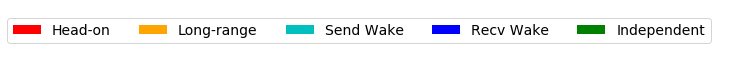

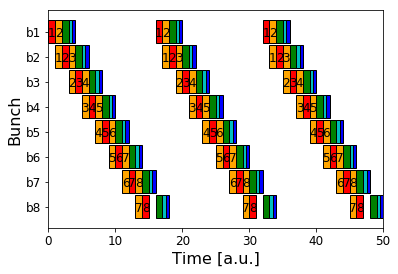

In [12]:

ind = np.arange(nB)    # the x locations for the groups
height = 0.9       # the width of the bars: can also be len(x) sequence
yticks = ind  #+ height/2.
cols = ['w','r','orange','c','b','g']

if bool_legend:
    mpl_fig = plt.figure(figsize=(2,1))
    ax = mpl_fig.add_subplot(111)
    for i in actList[1:]:    
        ax.barh(0,0,0,color=cols[i],left =0,
                label=['Wait','Head-on','Long-range',\
                                                   'Send Wake','Recv Wake','Independent'][i])
        ax.legend( #loc="upper left", bbox_to_anchor=(1,1),
            fontsize=14,
            ncol=6)
        plt.tight_layout()
        plt.axis('off')
        plt.savefig('00_Plots/legend.eps')

    
mpl_fig = plt.figure(figsize=([6,12][nTurns>3],4))
ax = mpl_fig.add_subplot(111)
for b in range(0,nB):
#     ax.barh(b,act_times[b,:],height,times[b,:], \
#                         color=cols[int(actions[b,step_tot])],
#                        edgecolor ='k')

    for turn in range(nTurns):
        cnt = -nLR
        for step in range(nSteps):
            step_tot = turn*nSteps + step

            if actions[b,step_tot]>0:
                ax.barh(b,tlist[int(actions[b,step_tot])],height, \
                        color=cols[int(actions[b,step_tot])],left =times[b,step_tot],
                       edgecolor ='k')

                if np.any(int(actions[b,step])==onetwo) and bool_annotate :
                    text = [b+cnt+1,1+(b+cnt+nB)%nB][bool_circular]
                    ax.annotate(text,xy =(times[b,step_tot]+0.5*tlist[int(actions[b,step_tot])],yticks[b]+0.05),\
                                ha='center',va='center')
            if np.any(int(pipeline[step])==onetwo):
                cnt+=1
# p1 = ax.barh(ind,menMeans,   height, color=(0.2588,0.4433,1.0))
# p2 = ax.barh(ind,womenMeans,  height, color=(1.0,0.5,0.62),left=menMeans)
ax.set_ylabel('Bunch')
ax.set_xlabel('Time [a.u.]')
# ax.set_title('Scores by group and gender')

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks(yticks )#
ax.set_yticklabels(('b'+str(i+1) for i in ind))#('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_xlim(0,np.max(times))




bool_combi      
bool_weakstrong 
bool_trained    
bool_circular   
bool_turnbyturn 
bool_annotate   
bool_BB         
bool_Wake       
plt.savefig('00_Plots/BB%d_Wak%d_Ind%d_T%d_WS%d_Combi%d_Circ%d_Anno%d_nB%d_nLR%d_nT%d_HO-LR%d_tWinv%d.eps'%(
    bool_BB,bool_Wake,bool_indep,bool_trained,bool_weakstrong,
    bool_combi,bool_circular,bool_annotate, nB ,nLR,nTurns,int(tHO/tLR) ,int(1./wake_fac) ))

# ax.grid(True)



status(tot_times, times, bool_trained,bool_turnbyturn)

You cannot get perfect load balancing between the bunches.

Must try to implement such that resources aren't idling when the bunch is idling.

In [275]:
[0,0]*False

[]